In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import requests

In [2]:
#Token / Ids
url='https://accounts.spotify.com/api/token'
client_id='39c58ce155a94f008ad14229d8447ef7'
client_secret='c03dc70737814e6cb7f887e50db315ed'

In [3]:
auth_response=requests.post(url, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
    })

In [4]:
auth_response_data=auth_response.json()
access_token=auth_response_data['access_token']
print(access_token)

BQD-p1Dc6sn5eJFE4qbvM6UPBFCcw1qJ7m3A0c3eGvAFxFRnjkvDVMgfo8jDF_aGkx1ypR6b_1anAmmGosQ


In [5]:
headers={'Authorization': 'Bearer {}'.format(access_token)}

In [6]:
#Rock Top 1000
import json
playlists_url='https://api.spotify.com/v1/playlists/'
playlists_id='7KMtxb9kh3TtVvJTdLtJ2K'

playlist_rock1=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(0),headers=headers)
rock_json=playlist_rock1.json()


playlist_rock2=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(100),headers=headers)
rock_json1=playlist_rock2.json()


playlist_rock3=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(200),headers=headers)
rock_json2=playlist_rock3.json()


playlist_rock4=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(300),headers=headers)
rock_json3=playlist_rock4.json()


playlist_rock5=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(400),headers=headers)
rock_json4=playlist_rock5.json()


playlist_rock6=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(500),headers=headers)
rock_json5=playlist_rock6.json()


playlist_rock7=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(600),headers=headers)
rock_json6=playlist_rock7.json()


playlist_rock8=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(700),headers=headers)
rock_json7=playlist_rock8.json()


playlist_rock9=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(800),headers=headers)
rock_json8=playlist_rock9.json()


playlist_rock10=requests.get(playlists_url+playlists_id+'/tracks?limit=100&offset='+str(900),headers=headers)
rock_json9=playlist_rock10.json()

#Normalize Rock Songs
rockjsons=[rock_json,rock_json1,rock_json2,rock_json3,rock_json4,rock_json5,rock_json6,rock_json7,rock_json8,rock_json9]
rockdf=pd.json_normalize(rockjsons,record_path='items')
rockdf['genre']='Rock'
rockdf.shape

(1000, 41)

In [7]:
#Trance Top 1000
playlists_id1='4BJbcyG5JosaXGyucqOyI7'
playlist_trance=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(0),headers=headers)
trance_json=playlist_trance.json()

playlist_trance1=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(100),headers=headers)
trance_json1=playlist_trance1.json()

playlist_trance2=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(200),headers=headers)
trance_json2=playlist_trance2.json()

playlist_trance3=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(300),headers=headers)
trance_json3=playlist_trance3.json()

playlist_trance4=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(400),headers=headers)
trance_json4=playlist_trance4.json()

playlist_trance5=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(500),headers=headers)
trance_json5=playlist_trance5.json()

playlist_trance6=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(600),headers=headers)
trance_json6=playlist_trance6.json()

playlist_trance7=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(700),headers=headers)
trance_json7=playlist_trance7.json()

playlist_trance8=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(800),headers=headers)
trance_json8=playlist_trance8.json()

playlist_trance9=requests.get(playlists_url+playlists_id1+ '/tracks?limit=100&offset='+str(900),headers=headers)
trance_json9=playlist_trance9.json()

#Normalize Trance Songs
trancejsons=[trance_json1,trance_json2,trance_json3,trance_json4,trance_json5,trance_json6,trance_json7,trance_json8,trance_json9,trance_json]
trancedf=pd.json_normalize(trancejsons,record_path='items')
trancedf['genre']='Trance'
trancedf.shape

(1000, 41)

In [8]:
#Top 1000 Hip Hop Rap
playlists_id2='5AVEP6Z2kNCo1ZHShutXbT'
playlist_rap=requests.get(playlists_url+playlists_id2+'/tracks?limit=100',headers=headers)
rap_json=playlist_rap.json()

playlist_rap1=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(100),headers=headers)
rap_json1=playlist_rap1.json()

playlist_rap2=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(200),headers=headers)
rap_json2=playlist_rap2.json()

playlist_rap3=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(300),headers=headers)
rap_json3=playlist_rap3.json()

playlist_rap4=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(400),headers=headers)
rap_json4=playlist_rap4.json()

playlist_rap5=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(500),headers=headers)
rap_json5=playlist_rap5.json()

playlist_rap6=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(600),headers=headers)
rap_json6=playlist_rap6.json()

playlist_rap7=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(700),headers=headers)
rap_json7=playlist_rap7.json()

playlist_rap8=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(800),headers=headers)
rap_json8=playlist_rap8.json()

playlist_rap9=requests.get(playlists_url+playlists_id2+ '/tracks?limit=100&offset='+str(900),headers=headers)
rap_json9=playlist_rap9.json()

#Normalize Rap Songs
rapjsons=[rap_json1,rap_json2,rap_json3,rap_json4,rap_json5,rap_json6,rap_json7,rap_json8,rap_json9,rap_json]
rapdf=pd.json_normalize(rapjsons,record_path='items')
rapdf['genre']='Rap'
rapdf.shape

(1000, 41)

In [10]:
# Top 1000 Country
playlists_id3='3RPaWvjgg1SAi8oIh09Irp'
playlists_country=requests.get(playlists_url+ playlists_id3+'/tracks?limit=100',headers=headers)
country_json=playlists_country.json()

playlist_country1=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(100),headers=headers)
country_json1=playlist_country1.json()

playlist_country2=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(200),headers=headers)
country_json2=playlist_country2.json()

playlist_country3=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(300),headers=headers)
country_json3=playlist_country3.json()

playlist_country4=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(400),headers=headers)
country_json4=playlist_country4.json()

playlist_country5=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(500),headers=headers)
country_json5=playlist_country5.json()

playlist_country6=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(600),headers=headers)
country_json6=playlist_country6.json()

playlist_country7=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(700),headers=headers)
country_json7=playlist_country7.json()

playlist_country8=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(800),headers=headers)
country_json8=playlist_country8.json()

playlist_country9=requests.get(playlists_url+playlists_id3+ '/tracks?limit=100&offset='+str(900),headers=headers)
country_json9=playlist_country9.json()

#Normalize Pop Songs
countryjsons=[country_json1,country_json2,country_json3,country_json4,country_json5,country_json6,country_json7,country_json8,country_json9,country_json]
countrydf=pd.json_normalize(countryjsons,record_path='items')
countrydf['genre']='Country'
countrydf.shape

(747, 41)

In [11]:
#R&B Top 1000
playlists_id4='7CI3NR7rvCkgiLhch1qprf'
playlists_rb=requests.get(playlists_url+playlists_id4+'/tracks?limit=100',headers=headers)
rb_json=playlists_rb.json()

playlist_rb1=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(100),headers=headers)
rb_json1=playlist_rb1.json()

playlist_rb2=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(200),headers=headers)
rb_json2=playlist_rb2.json()

playlist_rb3=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(300),headers=headers)
rb_json3=playlist_rb3.json()

playlist_rb4=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(400),headers=headers)
rb_json4=playlist_rb4.json()

playlist_rb5=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(500),headers=headers)
rb_json5=playlist_rb5.json()

playlist_rb6=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(600),headers=headers)
rb_json6=playlist_rb6.json()

playlist_rb7=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(700),headers=headers)
rb_json7=playlist_rb7.json()

playlist_rb8=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(800),headers=headers)
rb_json8=playlist_rb8.json()

playlist_rb9=requests.get(playlists_url+playlists_id4+ '/tracks?limit=100&offset='+str(900),headers=headers)
rb_json9=playlist_rb9.json()

#Normalize RB Tracks
rbjsons=[rb_json1,rb_json2,rb_json3,rb_json4,rb_json5,rb_json6,rb_json7,rb_json8,rb_json9,rb_json]
rbdf=pd.json_normalize(rbjsons,record_path='items')
rbdf['genre']='R&B'
rbdf.shape

(989, 41)

In [13]:
#Create DataFrame
df=pd.concat([rockdf,trancedf,rapdf,countrydf,rbdf],axis=0,ignore_index=True)
pd.set_option('display.max_columns',40)
df.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url,genre
0,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Santeria,78,None,True,6,track,spotify:track:2hnMS47jN0etwvFPzYk11f,None,Rock
1,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Livin' On A Prayer,83,None,True,3,track,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,None,Rock
2,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Sweet Child O' Mine,75,None,True,9,track,spotify:track:7snQQk1zcKl8gZ92AnueZW,None,Rock
3,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,What I Got,74,None,True,2,track,spotify:track:3B4q6KbHbGV51HO3GznBFF,None,Rock
4,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,...,False,Kickstart My Heart,77,https://p.scdn.co/mp3-preview/ef2d6aa6a12ee121...,True,5,track,spotify:track:7GonnnalI2s19OCQO1J7Tf,None,Rock


In [14]:
#Drop Irrelevant Columns
df.drop(['added_at','is_local','primary_color','added_by.external_urls.spotify','added_by.href','added_by.id'
        ,'added_by.type','added_by.uri','track.album.album_type','track.album.available_markets',
         'track.album.external_urls.spotify','track.album.href','track.album.id','track.album.images',
         'track.album.release_date_precision','track.album.total_tracks','track.album.uri','track.artists',
         'track.available_markets','track.disc_number','track.episode','track.external_ids.isrc',
         'track.external_urls.spotify','track.href','track.is_local','track.preview_url','track.track',
        'track.track_number','track.type','track.uri','video_thumbnail.url','track.album.type','track.album.artists',
        'track.album.name'],axis=1,inplace=True)

In [15]:
df.head()

,track.album.release_date,track.duration_ms,track.explicit,track.id,track.name,track.popularity,genre
0,1996-07-30,182746,False,2hnMS47jN0etwvFPzYk11f,Santeria,78,Rock
1,1986-08-16,249293,False,37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,83,Rock
2,1987-07-21,356066,False,7snQQk1zcKl8gZ92AnueZW,Sweet Child O' Mine,75,Rock
3,1996-07-30,170906,True,3B4q6KbHbGV51HO3GznBFF,What I Got,74,Rock
4,1989,282653,False,7GonnnalI2s19OCQO1J7Tf,Kickstart My Heart,77,Rock


In [16]:
df.duplicated().value_counts()

False    4734
True        2
dtype: int64

In [17]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [18]:
#Retrieve Audio Features
audio_url='https://api.spotify.com/v1/audio-features/'
audio_features=[]

def get_audio(df,audio_url):
    for x in df['track.id']:
        audio_feat=requests.get(audio_url+str(x),headers=headers)
        audiofeat_json=audio_feat.json()
        audio_features.append(audiofeat_json)

get_audio(df,audio_url)

df1=pd.json_normalize(audio_features)

In [19]:
#Merge based on TrackId
df=df.merge(df1,how='inner',left_on='track.id',right_on='id')
df.head()

,track.album.release_date,track.duration_ms,track.explicit,track.id,track.name,track.popularity,genre,danceability,energy,key,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,error.status,error.message
0,1996-07-30,182746,False,2hnMS47jN0etwvFPzYk11f,Santeria,78,Rock,0.682,0.765,1.0,...,90.807,audio_features,2hnMS47jN0etwvFPzYk11f,spotify:track:2hnMS47jN0etwvFPzYk11f,https://api.spotify.com/v1/tracks/2hnMS47jN0et...,https://api.spotify.com/v1/audio-analysis/2hnM...,182747.0,4.0,NaN,NaN
1,1986-08-16,249293,False,37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,83,Rock,0.532,0.887,0.0,...,122.511,audio_features,37ZJ0p5Jm13JPevGcx4SkF,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,https://api.spotify.com/v1/tracks/37ZJ0p5Jm13J...,https://api.spotify.com/v1/audio-analysis/37ZJ...,249293.0,4.0,NaN,NaN
2,1987-07-21,356066,False,7snQQk1zcKl8gZ92AnueZW,Sweet Child O' Mine,75,Rock,0.446,0.952,6.0,...,125.303,audio_features,7snQQk1zcKl8gZ92AnueZW,spotify:track:7snQQk1zcKl8gZ92AnueZW,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,https://api.spotify.com/v1/audio-analysis/7snQ...,356067.0,4.0,NaN,NaN
3,1996-07-30,170906,True,3B4q6KbHbGV51HO3GznBFF,What I Got,74,Rock,0.804,0.696,7.0,...,95.721,audio_features,3B4q6KbHbGV51HO3GznBFF,spotify:track:3B4q6KbHbGV51HO3GznBFF,https://api.spotify.com/v1/tracks/3B4q6KbHbGV5...,https://api.spotify.com/v1/audio-analysis/3B4q...,170907.0,4.0,NaN,NaN
4,1989,282653,False,7GonnnalI2s19OCQO1J7Tf,Kickstart My Heart,77,Rock,0.359,0.981,7.0,...,178.980,audio_features,7GonnnalI2s19OCQO1J7Tf,spotify:track:7GonnnalI2s19OCQO1J7Tf,https://api.spotify.com/v1/tracks/7GonnnalI2s1...,https://api.spotify.com/v1/audio-analysis/7Gon...,282653.0,4.0,NaN,NaN


In [20]:
df['time_signature'].value_counts()

4.0    4494
3.0     218
5.0      20
1.0      10
Name: time_signature, dtype: int64

In [21]:
#Duration to Seconds
df['track.duration']=df['track.duration_ms'].map(lambda x:x//1000)
#Track Release Year
df['release_year']=df['track.album.release_date'].str[:4]
#More Irrelevant Columns
df.drop(['track.id','type','id','uri','track_href','analysis_url','duration_ms','time_signature','error.status',
         'error.message','track.duration_ms','track.album.release_date'],axis=1,inplace=True)

In [22]:
df.head()

,track.explicit,track.name,track.popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.duration,release_year
0,False,Santeria,78,Rock,0.682,0.765,1.0,-5.021,0.0,0.0395,0.02680,0.000034,0.188,0.567,90.807,182,1996
1,False,Livin' On A Prayer,83,Rock,0.532,0.887,0.0,-3.757,1.0,0.0335,0.07780,0.000214,0.294,0.795,122.511,249,1986
2,False,Sweet Child O' Mine,75,Rock,0.446,0.952,6.0,-5.321,1.0,0.0523,0.09010,0.085700,0.112,0.624,125.303,356,1987
3,True,What I Got,74,Rock,0.804,0.696,7.0,-7.470,1.0,0.0899,0.00877,0.000985,0.314,0.657,95.721,170,1996
4,False,Kickstart My Heart,77,Rock,0.359,0.981,7.0,-3.622,0.0,0.3030,0.00125,0.002360,0.284,0.271,178.980,282,1989


In [28]:
df.isnull().any()

track.explicit      False
track.name          False
track.popularity    False
genre               False
danceability         True
energy               True
key                  True
loudness             True
mode                 True
speechiness          True
acousticness         True
instrumentalness     True
liveness             True
valence              True
tempo                True
track.duration      False
release_year         True
dtype: bool

In [31]:
df[pd.isnull(df['danceability'])]

,track.explicit,track.name,track.popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.duration,release_year
2063,False,Let Me Ride (feat. Jewell),0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
2064,False,Let Me Ride (feat. Jewell),0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
2065,False,Let Me Ride (feat. Jewell),0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
2066,False,Let Me Ride (feat. Jewell),0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
2067,False,Let Me Ride (feat. Jewell),0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,False,Bang Along [Explicit],0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,None
2123,False,Bang Along [Explicit],0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,None
2124,False,Bang Along [Explicit],0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,None
2125,False,Bang Along [Explicit],0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,None


In [32]:
#Remove Nulls
'''These songs are part of spotify playlist but no longer playable on spotify'''
df.dropna(inplace=True)

In [33]:
df.head()

,track.explicit,track.name,track.popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.duration,release_year
0,False,Santeria,78,Rock,0.682,0.765,1.0,-5.021,0.0,0.0395,0.02680,0.000034,0.188,0.567,90.807,182,1996
1,False,Livin' On A Prayer,83,Rock,0.532,0.887,0.0,-3.757,1.0,0.0335,0.07780,0.000214,0.294,0.795,122.511,249,1986
2,False,Sweet Child O' Mine,75,Rock,0.446,0.952,6.0,-5.321,1.0,0.0523,0.09010,0.085700,0.112,0.624,125.303,356,1987
3,True,What I Got,74,Rock,0.804,0.696,7.0,-7.470,1.0,0.0899,0.00877,0.000985,0.314,0.657,95.721,170,1996
4,False,Kickstart My Heart,77,Rock,0.359,0.981,7.0,-3.622,0.0,0.3030,0.00125,0.002360,0.284,0.271,178.980,282,1989


In [35]:
df[df.duplicated()]

,track.explicit,track.name,track.popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.duration,release_year
67,False,Picture (feat. Sheryl Crow),70,Rock,0.692,0.496,7.0,-7.332,1.0,0.0241,0.1720,0.000006,0.1070,0.376,97.945,298,2001
69,False,Picture (feat. Sheryl Crow),70,Country,0.692,0.496,7.0,-7.332,1.0,0.0241,0.1720,0.000006,0.1070,0.376,97.945,298,2001
515,False,Walk This Way,76,Rock,0.653,0.730,5.0,-10.613,1.0,0.0430,0.0114,0.000010,0.0754,0.894,108.705,220,1975
517,False,Walk This Way,76,Rap,0.653,0.730,5.0,-10.613,1.0,0.0430,0.0114,0.000010,0.0754,0.894,108.705,220,1975
737,False,What You Won't Do for Love,63,Rock,0.642,0.397,6.0,-16.842,1.0,0.0639,0.4610,0.000834,0.1060,0.798,84.064,286,1991
739,False,What You Won't Do for Love,63,R&B,0.642,0.397,6.0,-16.842,1.0,0.0639,0.4610,0.000834,0.1060,0.798,84.064,286,1991
976,False,Easy,76,Rock,0.589,0.384,10.0,-15.075,0.0,0.0332,0.1120,0.000028,0.0596,0.354,132.909,256,1977
978,False,Easy,76,R&B,0.589,0.384,10.0,-15.075,0.0,0.0332,0.1120,0.000028,0.0596,0.354,132.909,256,1977
2501,False,Doo Wop (That Thing),74,Rap,0.535,0.505,2.0,-8.926,0.0,0.2450,0.0393,0.000000,0.0923,0.495,99.935,320,1998
2503,False,Doo Wop (That Thing),74,R&B,0.535,0.505,2.0,-8.926,0.0,0.2450,0.0393,0.000000,0.0923,0.495,99.935,320,1998


In [36]:
#Keep first instance of song in multiple playlists
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [38]:
df.head()

,track.explicit,track.name,track.popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.duration,release_year
0,False,Santeria,78,Rock,0.682,0.765,1.0,-5.021,0.0,0.0395,0.02680,0.000034,0.188,0.567,90.807,182,1996
1,False,Livin' On A Prayer,83,Rock,0.532,0.887,0.0,-3.757,1.0,0.0335,0.07780,0.000214,0.294,0.795,122.511,249,1986
2,False,Sweet Child O' Mine,75,Rock,0.446,0.952,6.0,-5.321,1.0,0.0523,0.09010,0.085700,0.112,0.624,125.303,356,1987
3,True,What I Got,74,Rock,0.804,0.696,7.0,-7.470,1.0,0.0899,0.00877,0.000985,0.314,0.657,95.721,170,1996
4,False,Kickstart My Heart,77,Rock,0.359,0.981,7.0,-3.622,0.0,0.3030,0.00125,0.002360,0.284,0.271,178.980,282,1989


In [58]:
#Checking No Errors with Explicity
explicit=df['track.name'].str.find('explicit')!=-1
Explicit=df['track.name'].str.find('Explicit')!=-1
print(explicit.value_counts(),Explicit.value_counts())

False    4726
Name: track.name, dtype: int64 False    4723
True        3
Name: track.name, dtype: int64


In [67]:
df.iloc[np.where(Explicit==True)]

,track.explicit,track.name,track.popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.duration,release_year
2510,True,Even If - Album Version - Explicit,16,Rap,0.836,0.728,4.0,-4.668,0.0,0.198,0.059400,0.000000,0.0956,0.724,102.644,178,2000
2802,True,The Life - Album Version Edit (Explicit),49,Rap,0.427,0.706,0.0,-6.533,1.0,0.355,0.030500,0.000000,0.3230,0.508,173.913,189,2002
2862,True,Boom - Explicit Album Version,45,Rap,0.671,0.657,11.0,-5.884,0.0,0.107,0.000491,0.000023,0.0601,0.952,94.148,233,2001


In [77]:
df.dtypes

track.explicit         bool
track.name           object
track.popularity      int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
track.duration        int64
release_year         object
dtype: object

In [82]:
#Release year to int
df['release_year']=df['release_year'].apply(pd.to_numeric)

In [83]:
df.dtypes

track.explicit         bool
track.name           object
track.popularity      int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
track.duration        int64
release_year          int64
dtype: object

(array([  5.,  13.,  32.,  49.,  52.,  70., 107., 120., 210.,  89.]),
 array([1952. , 1958.7, 1965.4, 1972.1, 1978.8, 1985.5, 1992.2, 1998.9,
        2005.6, 2012.3, 2019. ]),
 <BarContainer object of 10 artists>)

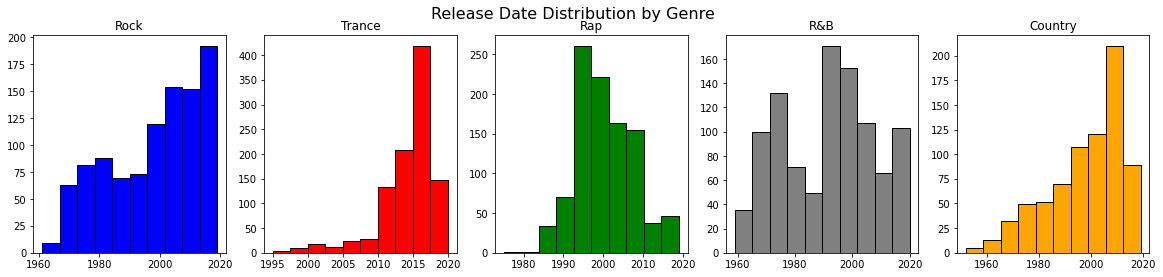

In [163]:
#Release Date Distribution by Genre
fig=plt.figure(figsize=(20,4))
fig.suptitle('Release Date Distribution by Genre',fontsize=16)

ax1=fig.add_subplot(1,5,1)
ax1.set_title('Rock')
ax1.hist(x='release_year',data=df[df['genre']=='Rock'],color='blue',edgecolor='black')

ax1=fig.add_subplot(1,5,2)
ax1.set_title('Trance')
ax1.hist(x='release_year',data=df[df['genre']=='Trance'],color='red',edgecolor='black')

ax1=fig.add_subplot(1,5,3)
ax1.set_title('Rap')
ax1.hist(x='release_year',data=df[df['genre']=='Rap'],color='green',edgecolor='black')

ax1=fig.add_subplot(1,5,4)
ax1.set_title('R&B')
ax1.hist(x='release_year',data=df[df['genre']=='R&B'],color='grey',edgecolor='black')

ax1=fig.add_subplot(1,5,5)
ax1.set_title('Country')
ax1.hist(x='release_year',data=df[df['genre']=='Country'],color='orange',edgecolor='black')

<AxesSubplot:title={'center':'Explicity by Genre'}, xlabel='genre', ylabel='count'>

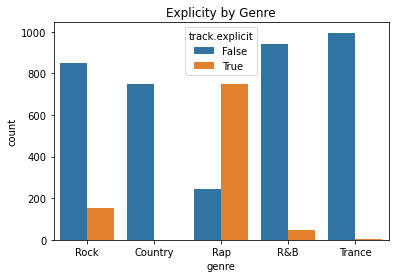

In [165]:
#Explicity by Genre
plt.title('Explicity by Genre')
sns.countplot(x='genre',data=df,hue='track.explicit')

<AxesSubplot:title={'center':'Release Year vs Popularity'}, xlabel='release_year', ylabel='track.popularity'>

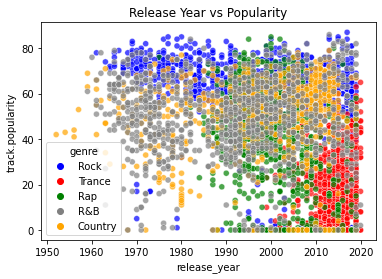

In [171]:
#Release Year vs Popularity
plt.title('Release Year vs Popularity')
sns.scatterplot(x='release_year',y='track.popularity',data=df,hue='genre',
                hue_order=['Rock','Trance','Rap','R&B','Country'],
                palette=['blue','red','green','grey','orange'],alpha=0.7)

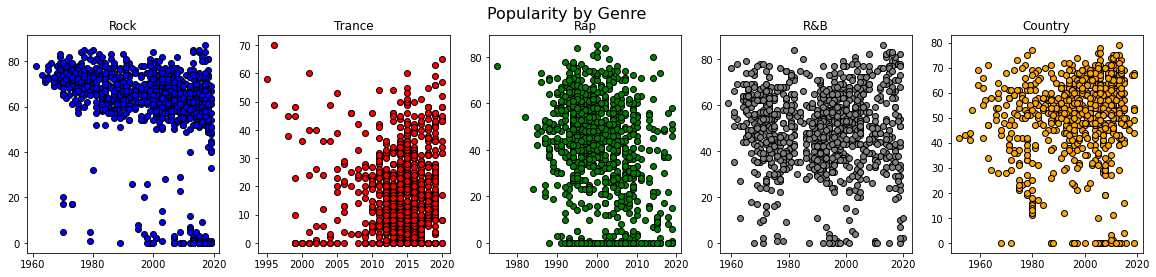

In [177]:
#By Specific Genre
fig=plt.figure(figsize=(20,4))
fig.suptitle('Popularity by Genre',fontsize=16)

ax1=fig.add_subplot(1,5,1)
ax1.set_title('Rock')
ax1.scatter(x='release_year',y='track.popularity',data=df[df['genre']=='Rock'],color='blue',edgecolor='black')

ax1=fig.add_subplot(1,5,2)
ax1.set_title('Trance')
ax1.scatter(x='release_year',y='track.popularity',data=df[df['genre']=='Trance'],color='red',edgecolor='black')

ax1=fig.add_subplot(1,5,3)
ax1.set_title('Rap')
ax1.scatter(x='release_year',y='track.popularity',data=df[df['genre']=='Rap'],color='green',edgecolor='black')

ax1=fig.add_subplot(1,5,4)
ax1.set_title('R&B')
ax1.scatter(x='release_year',y='track.popularity',data=df[df['genre']=='R&B'],color='grey',edgecolor='black')

ax1=fig.add_subplot(1,5,5)
ax1.set_title('Country')
ax1.scatter(x='release_year',y='track.popularity',data=df[df['genre']=='Country'],color='orange',edgecolor='black')

Text(0.5, 0, 'Duration (seconds)')

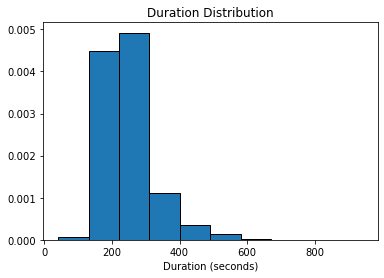

In [258]:
#Duration Distribution
plt.hist(df['track.duration'],density=True,edgecolor='black')
plt.title('Duration Distribution')
plt.xlabel('Duration (seconds)')

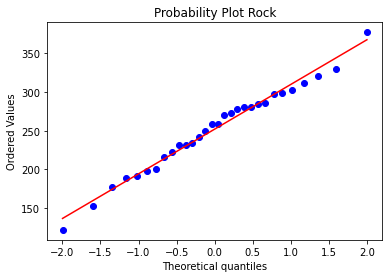

ShapiroResult(statistic=0.9880861043930054, pvalue=0.9776715040206909)


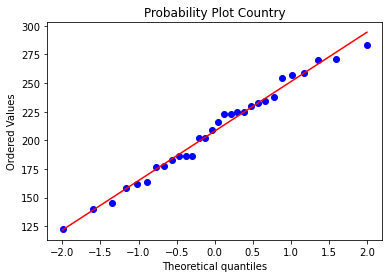

ShapiroResult(statistic=0.9784376621246338, pvalue=0.7826629281044006)


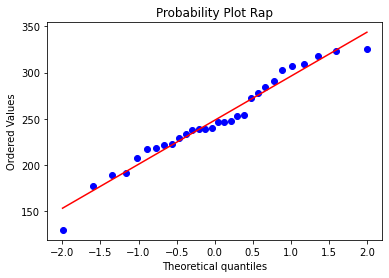

ShapiroResult(statistic=0.966978907585144, pvalue=0.4601562023162842)


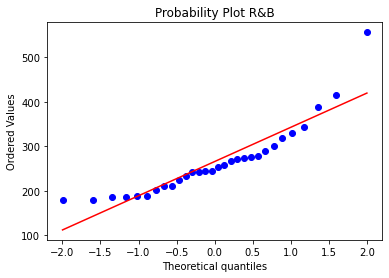

ShapiroResult(statistic=0.8425601720809937, pvalue=0.0004348614311311394)


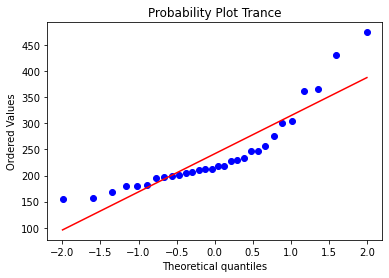

ShapiroResult(statistic=0.8231778144836426, pvalue=0.00017872230091597885)


In [262]:
#Checking normality QQPlot and Shapiro Wilks Test
genres=df['genre'].unique()
for genre in genres:
    data_sample=df[df['genre']==genre]['track.duration'].sample(30)
    st.probplot(data_sample,dist='norm',plot=plt)
    plt.title('Probability Plot ' +genre)
    plt.show()
    print(st.shapiro(data_sample))

In [276]:
#Homogenity of Variances
ratio=df[['track.duration','genre']].groupby('genre').sample(747).std().max()/df[['track.duration','genre']].groupby('genre').sample(747).std().min()
ratio

1.0094642585945974

In [288]:
#ANOVA Test
import statsmodels.api as sm
import statsmodels.formula.api as smf
df.rename(columns={'track.duration':'duration'},inplace=True)

model=smf.ols('duration ~ genre',data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
genre,4.0,1.860515e+06,465128.777495,88.067752,2.767076e-72
Residual,4721.0,2.493390e+07,5281.488027,NaN,NaN


In [280]:
df.head()

,track.explicit,track.name,track.popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.duration,release_year
0,False,Santeria,78,Rock,0.682,0.765,1.0,-5.021,0.0,0.0395,0.02680,0.000034,0.188,0.567,90.807,182,1996
1,False,Livin' On A Prayer,83,Rock,0.532,0.887,0.0,-3.757,1.0,0.0335,0.07780,0.000214,0.294,0.795,122.511,249,1986
2,False,Sweet Child O' Mine,75,Rock,0.446,0.952,6.0,-5.321,1.0,0.0523,0.09010,0.085700,0.112,0.624,125.303,356,1987
3,True,What I Got,74,Rock,0.804,0.696,7.0,-7.470,1.0,0.0899,0.00877,0.000985,0.314,0.657,95.721,170,1996
4,False,Kickstart My Heart,77,Rock,0.359,0.981,7.0,-3.622,0.0,0.3030,0.00125,0.002360,0.284,0.271,178.980,282,1989


In [303]:
#Summary of Audio Feautres
pd.set_option('display.max_rows',100)
df.groupby('genre').describe(include='float64').T

genre                      Country         R&B         Rap          Rock  \
danceability     count  747.000000  987.000000  992.000000  1.000000e+03   
                 mean     0.596189    0.664452    0.734325  5.042790e-01   
                 std      0.111259    0.144037    0.122027  1.258684e-01   
                 min      0.214000    0.185000    0.254000  1.330000e-01   
                 25%      0.529000    0.586500    0.658000  4.287500e-01   
                 50%      0.608000    0.676000    0.754000  5.090000e-01   
                 75%      0.673500    0.769000    0.826000  5.872500e-01   
                 max      0.879000    0.946000    0.965000  8.580000e-01   
energy           count  747.000000  987.000000  992.000000  1.000000e+03   
                 mean     0.578581    0.579746    0.694239  7.862230e-01   
                 std      0.210697    0.174429    0.143683  1.837015e-01   
                 min      0.021000    0.026400    0.253000  1.270000e-01   
                 25%      0.415500    0.449000    0.596750  6.810000e-01   
                 50%      0.585000    0.584000    0.705000  8.485000e-01   
                 75%      0.757500    0.711000    0.807000  9.300000e-01   
                 max      0.965000    0.974000    0.997000  9.980000e-01   
key              count  747.000000  987.000000  992.000000  1.000000e+03   
                 mean     5.378849    5.579534    5.775202  5.133000e+00   
                 std      3.354359    3.509839    3.708184  3.538054e+00   
                 min      0.000000    0.000000    0.000000  0.000000e+00   
                 25%      2.000000    2.000000    2.000000  2.000000e+00   
                 50%      5.000000    6.000000    6.000000  5.000000e+00   
                 75%      8.000000    9.000000    9.000000  8.000000e+00   
                 max     11.000000   11.000000   11.000000  1.100000e+01   
loudness         count  747.000000  987.000000  992.000000  1.000000e+03   
                 mean    -8.965984   -9.337009   -7.352466 -6.182699e+00   
                 std      3.915054    3.154569    3.152346  3.006795e+00   
                 min    -24.385000  -23.883000  -20.749000 -2.232000e+01   
                 25%    -11.535500  -11.308500   -9.050000 -7.514500e+00   
                 50%     -8.343000   -9.142000   -6.763000 -5.436000e+00   
                 75%     -5.773000   -6.991000   -5.131000 -4.034750e+00   
                 max     -1.825000   -1.609000   -0.150000 -1.278000e+00   
mode             count  747.000000  987.000000  992.000000  1.000000e+03   
                 mean     0.946452    0.541033    0.508065  6.820000e-01   
                 std      0.225273    0.498566    0.500187  4.659325e-01   
                 min      0.000000    0.000000    0.000000  0.000000e+00   
                 25%      1.000000    0.000000    0.000000  0.000000e+00   
                 50%      1.000000    1.000000    1.000000  1.000000e+00   
                 75%      1.000000    1.000000    1.000000  1.000000e+00   
                 max      1.000000    1.000000    1.000000  1.000000e+00   
speechiness      count  747.000000  987.000000  992.000000  1.000000e+03   
                 mean     0.039876    0.068903    0.261579  6.800240e-02   
                 std      0.028720    0.061241    0.114166  5.277943e-02   
                 min      0.023300    0.023300    0.028800  2.410000e-02   
                 25%      0.029000    0.035550    0.182000  3.535000e-02   
                 50%      0.033200    0.046800    0.264000  4.985000e-02   
                 75%      0.040350    0.072950    0.335000  7.877500e-02   
                 max      0.351000    0.639000    0.817000  4.880000e-01   
acousticness     count  747.000000  987.000000  992.000000  1.000000e+03   
                 mean     0.370011    0.273945    0.137785  8.949115e-02   
                 std      0.276889    0.244730    0.160942  1.733055e-01   
                 min      0.000159    0.000113  

In [291]:
df.dtypes

track.explicit         bool
track.name           object
track.popularity      int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration              int64
release_year          int64
dtype: object

<AxesSubplot:>

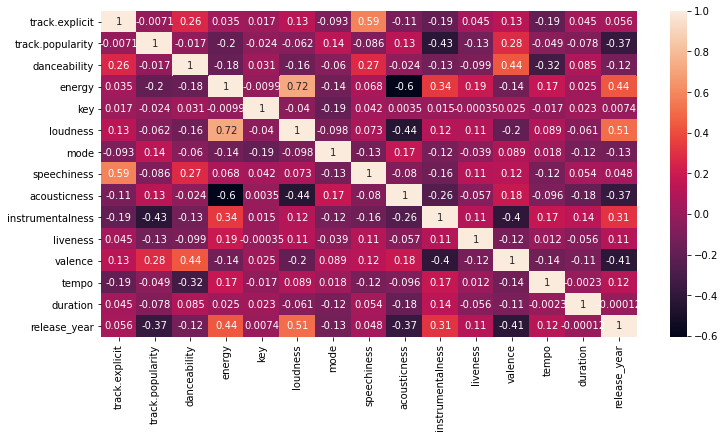

In [312]:
#Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

R Squared 0.5218980685895056


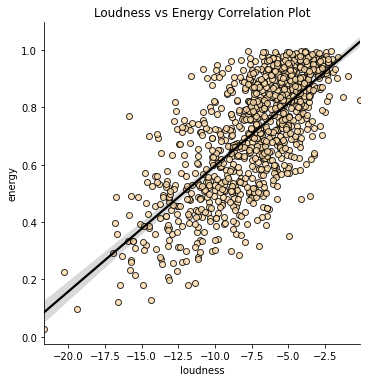

In [357]:
#Loudness vs Energy Correlation Plot
sns.lmplot(x='loudness',y='energy',data=df.sample(1000),line_kws={'color':'black'},scatter_kws={'color':'navajowhite','edgecolor':'black'})
plt.title('Loudness vs Energy Correlation Plot')
print('R Squared',st.pearsonr(df['energy'],y=df['loudness'])[0]**2)

R Squared 0.3653724041700694


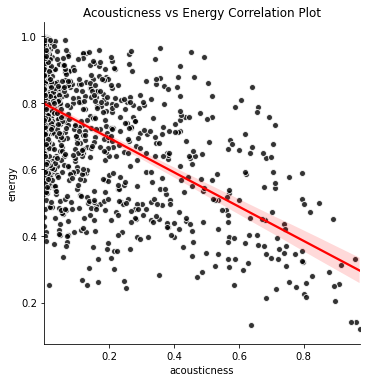

In [356]:
#Acousticness vs Energy Correlation Plot
sns.lmplot(x='acousticness',y='energy',data=df.sample(1000),line_kws={'color':'red'},scatter_kws={'color':'black','edgecolor':'white'})
plt.title('Acousticness vs Energy Correlation Plot')
print('R Squared',st.pearsonr(df['acousticness'],y=df['energy'])[0]**2)

R Squared 0.26103101465632594


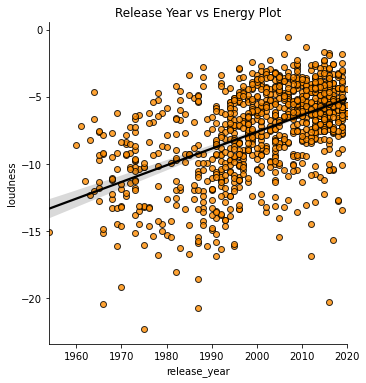

In [361]:
#Loudness vs Release_Year
sns.lmplot(x='release_year',y='loudness',data=df.sample(1000),line_kws={'color':'black'},scatter_kws={'color':'darkorange','edgecolor':'black'})
plt.title('Release Year vs Energy Plot')
print('R Squared',st.pearsonr(df['release_year'],y=df['loudness'])[0]**2)

array([[<AxesSubplot:title={'center':'track.popularity'}>]], dtype=object)

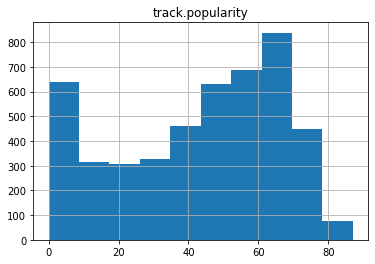

In [364]:
#Popularity Distribution
df.hist('track.popularity')

In [365]:
df.columns

Index(['track.explicit', 'track.name', 'track.popularity', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'release_year'],
      dtype='object')

In [381]:
#Import class and set variables
from sklearn.tree import DecisionTreeRegressor
df=pd.get_dummies(df)
X=df[['track.explicit','genre_Country','genre_R&B','genre_Rap','genre_Rock','genre_Trance','danceability','energy',
     'loudness','speechiness','acousticness','instrumentalness','valence','tempo','duration','release_year']]
y=df['track.popularity']

#Create an object
dtr1=DecisionTreeRegressor(max_depth=5)

#Fit the model
dtr1.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [383]:
from sklearn.tree import export_graphviz
import graphviz

data=export_graphviz(dtr1)

graph=graphviz.Source(data)
graph.render('tree')

'tree.pdf'